In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [2]:
filepath = r'C:\Users\shrey\Documents\1st_Sem_Study\Projects\MachineLearning2\heart.csv'

dataset = pd.read_csv(filepath)

In [3]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21


In [4]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.536390
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.285822
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.260000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.710000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,0.810000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.900000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 112.2 KB


In [6]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
dataset.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0.16
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,0.73
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,0.85
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0.15


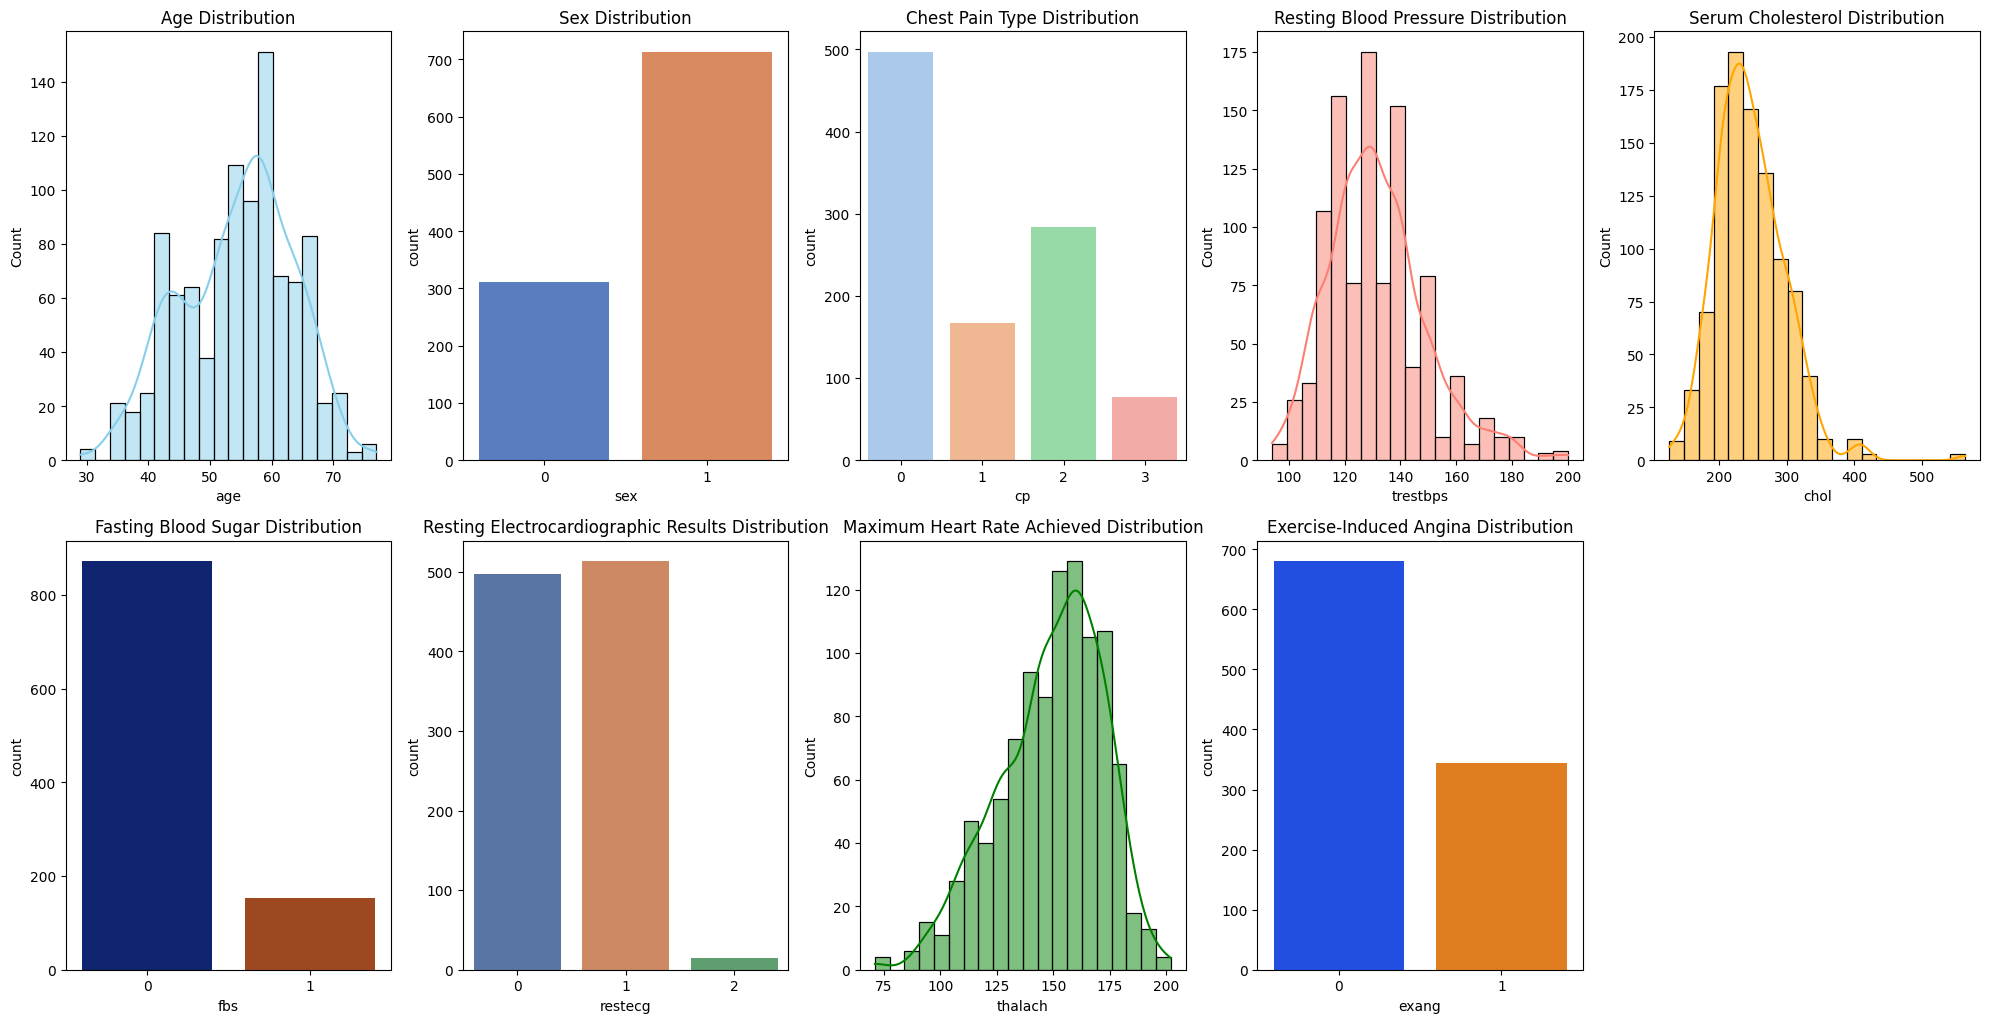

In [8]:
df = dataset

plt.figure(figsize=(20, 15))

# Age Distribution
plt.subplot(3, 5, 1)
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')

# Sex Distribution
plt.subplot(3, 5, 2)
sns.countplot(x='sex', hue='sex', data=df, palette='muted', legend=False)
plt.title('Sex Distribution')

# Chest Pain Type Distribution
plt.subplot(3, 5, 3)
sns.countplot(x='cp', hue='cp', data=df, palette='pastel', legend=False)
plt.title('Chest Pain Type Distribution')

# Resting Blood Pressure Distribution
plt.subplot(3, 5, 4)
sns.histplot(df['trestbps'], bins=20, kde=True, color='salmon')
plt.title('Resting Blood Pressure Distribution')

# Serum Cholesterol Distribution
plt.subplot(3, 5, 5)
sns.histplot(df['chol'], bins=20, kde=True, color='orange')
plt.title('Serum Cholesterol Distribution')

# Fasting Blood Sugar Distribution
plt.subplot(3, 5, 6)
sns.countplot(x='fbs', hue='fbs', data=df, palette='dark', legend=False)
plt.title('Fasting Blood Sugar Distribution')

# Resting Electrocardiographic Results Distribution
plt.subplot(3, 5, 7)
sns.countplot(x='restecg', hue='restecg', data=df, palette='deep', legend=False)
plt.title('Resting Electrocardiographic Results Distribution')

# Maximum Heart Rate Achieved Distribution
plt.subplot(3, 5, 8)
sns.histplot(df['thalach'], bins=20, kde=True, color='green')
plt.title('Maximum Heart Rate Achieved Distribution')

# Exercise-Induced Angina Distribution
plt.subplot(3, 5, 9)
sns.countplot(x='exang', hue='exang', data=df, palette='bright', legend=False)
plt.title('Exercise-Induced Angina Distribution')


plt.tight_layout()
plt.show()

In [10]:
# Assuming 'y' is your original target variable
threshold = 0.5
y_binary = (df['target'] > threshold).astype(int)

# Now 'y_binary' contains binary classes (0 or 1)

# Use the modified 'y_binary' for further processing
X = df.drop('target', axis=1)
y = y_binary  # Use the modified target variable

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print("Training set shape - X: {}, y: {}".format(X_train.shape, y_train.shape))
print("Testing set shape - X: {}, y: {}".format(X_test.shape, y_test.shape))


Training set shape - X: (820, 13), y: (820,)
Testing set shape - X: (205, 13), y: (205,)


In [13]:
# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Print the evaluation metrics for Random Forest
print("Random Forest Accuracy: {:.2f}%".format(accuracy_rf * 100))
print("\nRandom Forest Confusion Matrix:\n", conf_matrix_rf)
print("\nRandom Forest Classification Report:\n", classification_rep_rf)

Random Forest Accuracy: 98.54%

Random Forest Confusion Matrix:
 [[102   0]
 [  3 100]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [16]:
# Create a new dataset with similar features
new_data = pd.DataFrame({
    'age': [45, 55, 65],
    'sex': [1, 0, 1],
    'cp': [2, 0, 1],
    'trestbps': [130, 140, 150],
    'chol': [220, 240, 260],
    'fbs': [0, 1, 0],
    'restecg': [1, 0, 1],
    'thalach': [160, 150, 140],
    'exang': [0, 1, 0],
    'oldpeak': [1.2, 2.5, 0.8],
    'slope': [1, 2, 0],
    'ca': [1, 0, 2],
    'thal': [2, 3, 1]
})

# Make predictions using the trained Random Forest model
new_predictions = rf_model.predict(new_data)

# Display the predictions
prediction_df = pd.DataFrame({'Prediction': new_predictions})

# Display the predictions with human-readable labels
prediction_df['Prediction_Label'] = prediction_df['Prediction'].apply(lambda x: 'Heart attack' if x == 1 else 'No heart attack')

# Print the updated predictions
print("New Predictions:")
print(prediction_df[['Prediction_Label']])

New Predictions:
  Prediction_Label
0     Heart attack
1  No heart attack
2  No heart attack
